text    21
dtype: int64


<Axes: >

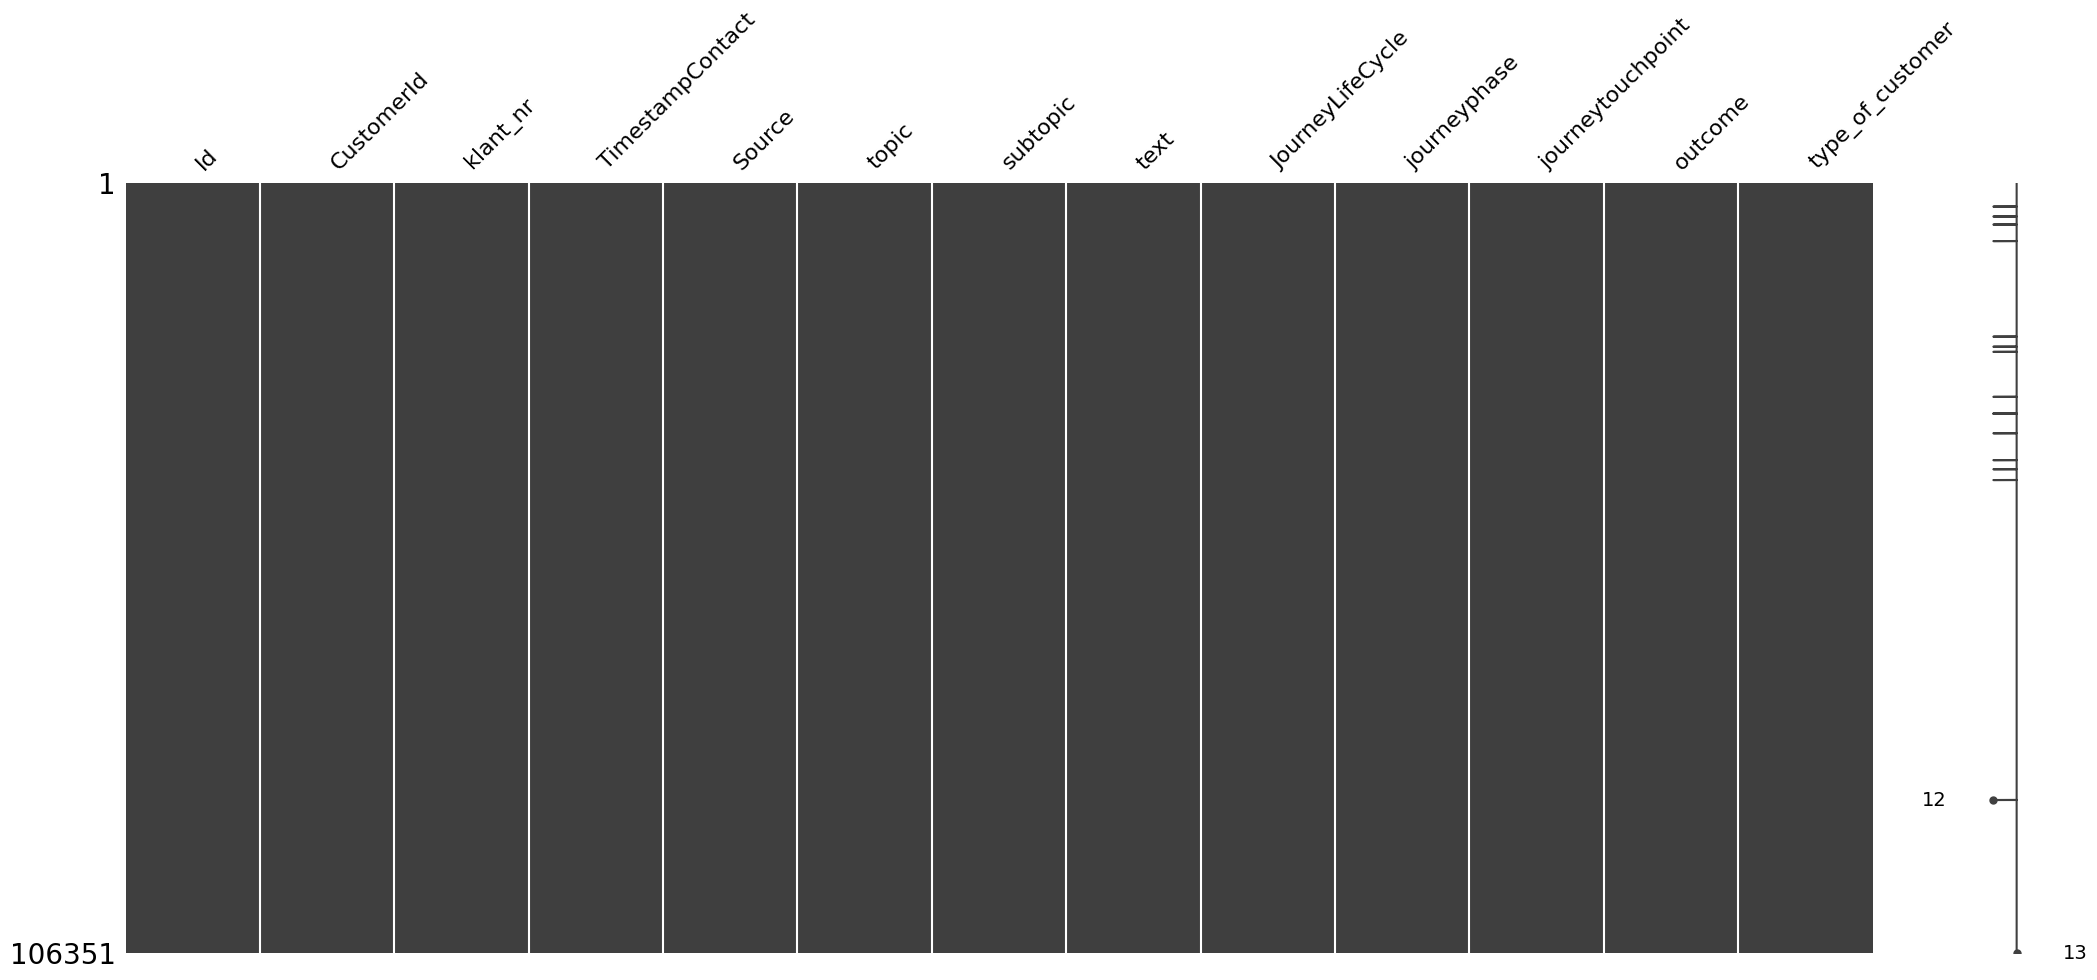

In [11]:
import pandas as pd
import os

# log = argv[1]
log = 'mortgages'
working_directory = "K:/Klanten/De Volksbank/Thesis Andrei"
input_file = working_directory + "/Andrei_thesis_KRIF_"+log+"_vPaul_v2.csv"
# Create the directory if it doesn't exist
# os.makedirs("datasets/"+log, exist_ok=True)


# Load the CSV file
df = pd.read_csv(input_file, encoding='latin-1')

# Get an overview of missing values
missing_summary = df.isnull().sum()

# Display columns with missing values
print(missing_summary[missing_summary > 0])

import missingno as msno

# Visualize missing data
msno.matrix(df)

In [11]:
df.head()

Id  CustomerId  klant_nr     TimestampContact      Source         topic  \
0  97495          17   1003756  2024-08-27T14:51:44  Klantbeeld       Contact   
1  79779          17   1003756     2024-08-29T00:00       Force        Funnel   
2  97496          17   1003756  2024-08-29T12:02:28  Klantbeeld       Contact   
3  97497          17   1003756     2024-08-29T12:04  Klantbeeld       Verkoop   
4  79785          17   1003756     2024-10-02T00:00  Klantbeeld  Systeembrief   

                  subtopic                                               text  \
0          Aankoop/verkoop  Van: [PII_NAME], R.C.G.J. ([PII_NAME]) Verzond...   
1       Offerte acceptatie  Offerte voor hypotheek is geaccepteerd door de...   
2  Persoonlijk bericht SNS       Hypotheek finaal akkoord. Factuur aangemaakt   
3                      OTD                                            Verkoop   
4               Informatie  bericht nieuwe rente na omtyperen meeneem-hoof...   

  JourneyLifeCycle   journeyphase  \
0   Ik blijf klant  Heroriënteren   
1    Ik word klant      Aanvragen   
2   Ik blijf klant  Heroriënteren   
3   Ik blijf klant  Heroriënteren   
4     Ik ben klant        Regelen   

                                journeytouchpoint     outcome  \
0  Ik heroriënteer mij over producten en diensten     Success   
1                      Ik ontvang een bevestiging     Success   
2  Ik heroriënteer mij over producten en diensten     Success   
3  Ik heroriënteer mij over producten en diensten     Success   
4                           Ik ontvang informatie  No Success   

             type_of_customer  
0  Existing mortgage customer  
1  Existing mortgage customer  
2  Existing mortgage customer  
3  Existing mortgage customer  
4  Existing mortgage customer

In [ ]:
# Calculate the count of each unique value in the 'outcome' column
outcome_counts = df['outcome'].value_counts()

# Calculate the percentage of each unique value
outcome_percentages = df['outcome'].value_counts(normalize=True) * 100

# Combine the count and percentage into a single DataFrame
outcome_summary = pd.DataFrame({
    'Count': outcome_counts,
    'Percentage': outcome_percentages
})

# Display the result
print(outcome_summary)

In [ ]:
# Calculate the count of each unique value in the 'type_of_customer' column
customer_type_counts = df['type_of_customer'].value_counts()

# Calculate the percentage of each unique value
customer_type_percentages = df['type_of_customer'].value_counts(normalize=True) * 100

# Combine the count and percentage into a single DataFrame
customer_type_summary = pd.DataFrame({
    'Count': customer_type_counts,
    'Percentage': customer_type_percentages
})

# Display the result
print(customer_type_summary)

In [2]:
# Define placeholder values to check
placeholder_values = [0, '0', 'NaN', 'nan', 'NA', 'na', '-', '', None]

# Function to check each column for issues
def check_column_issues(df):
    for column in df.columns:
        print(f"--- Checking column: {column} ---")

        # 1. Check if format is consistent
        unique_entities = df[column].dropna().apply(type).unique()
        if len(unique_entities) > 1:
            print(f"Inconsistent formats: {unique_entities}")

        # 2. Check for rows with missing values
        missing_rows = df[column].isnull().sum()
        print(f"Missing values: {missing_rows}")

        # 3. Check for placeholder values
        placeholders = df[column].isin(placeholder_values).sum()
        print(f"Placeholder values found: {placeholders}")

        # 4. Check for type inconsistencies in numeric columns
        if pd.api.types.is_numeric_dtype(df[column]):
            non_numeric = df[column].apply(lambda x: not pd.api.types.is_number(x) and x not in placeholder_values).sum()
            print(f"Non-numeric values in numeric column: {non_numeric}")
        elif pd.api.types.is_string_dtype(df[column]):
            numeric_in_string_col = df[column].apply(lambda x: pd.api.types.is_number(x)).sum()
            print(f"Numeric values in string column: {numeric_in_string_col}")
        else:
            print("No numeric or string type inconsistencies found.")

        print("\n")

# Run the check
check_column_issues(df)

--- Checking column: Id ---
Missing values: 0
Placeholder values found: 0
Non-numeric values in numeric column: 0


--- Checking column: CustomerId ---
Missing values: 0
Placeholder values found: 0
Non-numeric values in numeric column: 0


--- Checking column: klant_nr ---
Missing values: 0
Placeholder values found: 0
Non-numeric values in numeric column: 0


--- Checking column: TimestampContact ---
Missing values: 0
Placeholder values found: 0
Numeric values in string column: 0


--- Checking column: Source ---
Missing values: 0
Placeholder values found: 0
Numeric values in string column: 0


--- Checking column: topic ---
Missing values: 0
Placeholder values found: 0
Numeric values in string column: 0


--- Checking column: subtopic ---
Missing values: 0
Placeholder values found: 0
Numeric values in string column: 0


--- Checking column: text ---
Missing values: 21
Placeholder values found: 0
No numeric or string type inconsistencies found.


--- Checking column: JourneyLifeCycle -

In [6]:
import pandas as pd
from datetime import datetime

# Define the function to check timestamp consistency
def check_timestamp_consistency(df, column_name):
    print(f"--- Checking column: {column_name} ---")

    # Attempt to parse each value in the column and track inconsistent formats
    consistent_format = None
    inconsistent_values = []

    for timestamp in df[column_name]:
        try:
            # Try parsing with the first valid format encountered
            if consistent_format is None:
                consistent_format = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')

            # Check if the current timestamp matches the inferred format
            datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
        except ValueError:
            # Record the inconsistent value
            inconsistent_values.append(timestamp)

    # Output results
    if inconsistent_values:
        print("Inconsistent timestamps found:")
        print(inconsistent_values)
    else:
        print("All timestamps are consistent.")

    # Check for missing or placeholder values
    placeholder_values = [None, '', '0', '-', 'NaN', 'nan', 'NA', 'na']
    placeholders = df[column_name].isin(placeholder_values).sum()
    print(f"Placeholder values found: {placeholders}")

# Run the check on the 'TimestampContact' column
check_timestamp_consistency(df, 'TimestampContact')

--- Checking column: TimestampContact ---
Inconsistent timestamps found:
['2024-08-27T14:51:44', '2024-08-29T00:00', '2024-08-29T12:02:28', '2024-08-29T12:04', '2024-10-02T00:00', '2024-10-18T00:00', '2022-10-20T11:06:17', '2022-11-01T00:00', '2023-01-01T00:00', '2023-02-01T00:00', '2023-04-01T00:00', '2023-07-01T00:00', '2023-10-01T00:00', '2024-08-29T00:00', '2024-09-10T00:00', '2024-09-12T00:00', '2024-10-18T00:00', '2022-10-18T00:00', '2022-10-28T15:48:27', '2022-10-28T15:54:15', '2022-10-28T16:09:59', '2022-10-28T16:10:01', '2022-11-11T00:00', '2024-06-20T09:32:55', '2024-06-20T09:32:58', '2024-06-20T12:21:32', '2024-06-20T12:21:33', '2024-06-20T12:48:01', '2024-06-20T12:48:03', '2024-06-24T13:59:29', '2024-06-25T14:00', '2024-08-27T00:00', '2024-09-09T00:00', '2024-09-11T15:44:04', '2024-09-11T15:46:05', '2023-08-03T00:00', '2023-08-09T00:00', '2023-08-22T00:00', '2023-12-28T16:56:22', '2024-09-23T14:11:15', '2024-09-23T14:11:15', '2024-09-23T14:11:16', '2024-09-23T14:35:36', '20

In [12]:
from datetime import datetime

def normalize_timestamps(df, column_name, target_format='%Y-%m-%d %H:%M:%S'):
    print(f"--- Normalizing timestamps in column: {column_name} ---")

    def convert_to_format(value):
        try:
            # Try parsing the timestamp and reformatting it
            return datetime.fromisoformat(value).strftime(target_format)
        except ValueError:
            try:
                # If parsing fails, attempt other known formats
                return datetime.strptime(value, '%Y-%m-%dT%H:%M:%S').strftime(target_format)
            except ValueError:
                try:
                    return datetime.strptime(value, '%Y-%m-%dT%H:%M').strftime(target_format)
                except ValueError:
                    # Return the original value if it cannot be parsed
                    return None

    # Apply the conversion function to the column
    df[column_name] = df[column_name].apply(convert_to_format)

    # Check for any remaining unparseable values
    unparseable = df[column_name].isnull().sum()
    print(f"Unparseable values after normalization: {unparseable}")

    return df

# Normalize the 'TimestampContact' column
df = normalize_timestamps(df, 'TimestampContact')
df['Activity'] = df['topic'].astype(str) + "_" + df['subtopic'].astype(str)
# Save the cleaned file if needed
df.to_csv('normalized_timestamps.csv', index=False)

--- Normalizing timestamps in column: TimestampContact ---
Unparseable values after normalization: 0


In [13]:
# check_timestamp_consistency(df, 'TimestampContact')
df.head()

Id  CustomerId  klant_nr     TimestampContact      Source         topic  \
0  97495          17   1003756  2024-08-27 14:51:44  Klantbeeld       Contact   
1  79779          17   1003756  2024-08-29 00:00:00       Force        Funnel   
2  97496          17   1003756  2024-08-29 12:02:28  Klantbeeld       Contact   
3  97497          17   1003756  2024-08-29 12:04:00  Klantbeeld       Verkoop   
4  79785          17   1003756  2024-10-02 00:00:00  Klantbeeld  Systeembrief   

                  subtopic                                               text  \
0          Aankoop/verkoop  Van: [PII_NAME], R.C.G.J. ([PII_NAME]) Verzond...   
1       Offerte acceptatie  Offerte voor hypotheek is geaccepteerd door de...   
2  Persoonlijk bericht SNS       Hypotheek finaal akkoord. Factuur aangemaakt   
3                      OTD                                            Verkoop   
4               Informatie  bericht nieuwe rente na omtyperen meeneem-hoof...   

  JourneyLifeCycle   journeyphase  \
0   Ik blijf klant  Heroriënteren   
1    Ik word klant      Aanvragen   
2   Ik blijf klant  Heroriënteren   
3   Ik blijf klant  Heroriënteren   
4     Ik ben klant        Regelen   

                                journeytouchpoint     outcome  \
0  Ik heroriënteer mij over producten en diensten     Success   
1                      Ik ontvang een bevestiging     Success   
2  Ik heroriënteer mij over producten en diensten     Success   
3  Ik heroriënteer mij over producten en diensten     Success   
4                           Ik ontvang informatie  No Success   

             type_of_customer                         Activity  
0  Existing mortgage customer          Contact_Aankoop/verkoop  
1  Existing mortgage customer        Funnel_Offerte acceptatie  
2  Existing mortgage customer  Contact_Persoonlijk bericht SNS  
3  Existing mortgage customer                      Verkoop_OTD  
4  Existing mortgage customer          Systeembrief_Informatie

In [14]:
# !pip install pm4py
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import factory as log_conversion
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory

# Load the dataset
df = pd.read_csv('normalized_timestamps.csv')

# Create a new column for case ID by aggregating topic and subtopic
df['case:concept:name'] = df['topic'].astype(str) + "_" + df['subtopic'].astype(str)

# Rename columns to standard process mining notation
# Assume 'TimestampContact' is the timestamp column and 'outcome' is the event
df.rename(columns={
    'TimestampContact': 'time:timestamp',
    'outcome': 'concept:name',
}, inplace=True)

# Ensure the timestamp column is in datetime format
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

# Convert the DataFrame into an event log
df = dataframe_utils.convert_timestamp_columns_in_df(df)
event_log = log_conversion.apply(df)

# Discover process tree using Inductive Miner
process_tree = inductive_miner.apply_tree(event_log)

# Generate and save the visualization
gviz = pt_vis_factory.apply(process_tree)
pt_vis_factory.view(gviz)


ImportError: cannot import name 'factory' from 'pm4py.objects.conversion.log' (C:\Users\andrei.oprea\PycharmProjects\Thesis_Codebase\venv\Lib\site-packages\pm4py\objects\conversion\log\__init__.py)

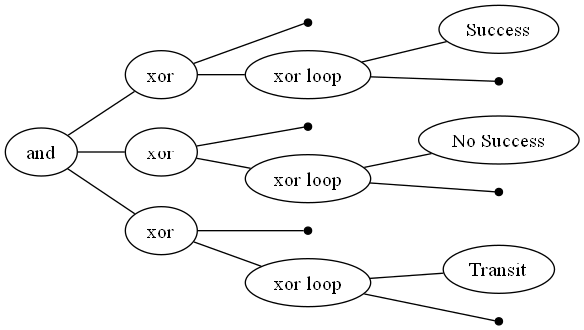

In [9]:
import pandas as pd
import pm4py
!pip install graphviz

# Load your DataFrame
df = pm4py.format_dataframe(pd.read_csv('normalized_timestamps.csv'), case_id='CustomerId', activity_key='Activity', timestamp_key='TimestampContact')

# Create the case:concept:name column
df['case:concept:name'] = df['topic'].astype(str) + "_" + df['subtopic'].astype(str)

# Rename columns to meet pm4py requirements
df.rename(columns={
    'TimestampContact': 'time:timestamp',
    'outcome': 'concept:name'
}, inplace=True)

# Ensure time:timestamp is in datetime format
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'], errors='coerce')

# Check for invalid timestamps and remove them
if df['time:timestamp'].isnull().any():
    print("Warning: Some timestamps are invalid and will be removed.")
    df = df.dropna(subset=['time:timestamp'])

# Discover process tree using Inductive Miner
event_log = pm4py.convert_to_event_log(df)
process_tree = pm4py.discover_process_tree_inductive(event_log)

# Visualize the process tree
pm4py.view_process_tree(process_tree)

In [ ]:
import pandas as pd
import pm4py
df = pm4py.format_dataframe(pd.read_csv('normalized_timestamps.csv'), case_id='CustomerId', activity_key='Activity', timestamp_key='TimestampContact')
bpmn_model = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_model)

In [ ]:
import pandas as pd
import pm4py
df = pm4py.format_dataframe(pd.read_csv('normalized_timestamps.csv'), case_id='CustomerId', activity_key='Activity', timestamp_key='TimestampContact')
bpmn_model = pm4py.discover_bpmn_inductive(df, 0.8)
pm4py.view_bpmn(bpmn_model)

In [ ]:
net, im, fm = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(net, im, fm)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('normalized_timestamps.csv')

# Group by CustomerId and check if all outcomes in each group are the same
inconsistent_cases = df.groupby('CustomerId')['outcome'].nunique()

# Filter for cases where the number of unique outcomes is greater than 1
inconsistent_cases = inconsistent_cases[inconsistent_cases > 1]

# Output results
if inconsistent_cases.empty:
    print("All cases have consistent outcome labels.")
else:
    print("Inconsistent cases found:")
    print(inconsistent_cases)


In [1]:
import pandas as pd

df = pd.read_csv('normalized_timestamps.csv')

# Ensure timestamp column is in datetime format
df['TimestampContact'] = pd.to_datetime(df['TimestampContact'], errors='coerce')

# Check for invalid timestamps
if df['TimestampContact'].isnull().any():
    print("Warning: Some timestamps are invalid and will be removed.")
    df = df.dropna(subset=['TimestampContact'])


In [ ]:
import pandas as pd
import pm4py

# Load and format the DataFrame
df = pm4py.format_dataframe(
    pd.read_csv('normalized_timestamps.csv'),
    case_id='CustomerId',
    activity_key='Activity',
    timestamp_key='TimestampContact',
)
# samples=4000
freq=0.2

# Filter for a subset of cases (e.g., first 100 cases)
df = df[df['CustomerId'].isin(df['CustomerId'].unique())]

# Discover BPMN model using the inductive miner
bpmn_model = pm4py.discover_bpmn_inductive(df, freq)

# Save the BPMN model visualization to an image file
output_image_path = f"bpmn_model_full_{freq}.png"
pm4py.save_vis_bpmn(bpmn_model, output_image_path)

print(f"BPMN model saved to {output_image_path}")


In [8]:
df = pm4py.format_dataframe(
    pd.read_csv('normalized_timestamps.csv'),
    case_id='CustomerId',
    activity_key='Activity',
    timestamp_key='TimestampContact'
)
print(len(df['CustomerId'].unique()))

8881


In [16]:
net, im, fm = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(net, im, fm)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)